In [1]:
import pandas as pd

In [2]:
AQI_data_2016= pd.read_csv(".\data\AQI_data_2016.csv",parse_dates=["Date (LT)"]);

In [3]:
AQI_data_2016.shape

(8784, 14)

In [4]:
AQI_data_2015 = pd.read_csv(r".\data\AQI_data_2015.csv",parse_dates=["Date (LT)"]);
AQI_data_2015.shape

(8760, 14)

In [5]:
AQI_data_2017= pd.read_csv(".\data\AQI_data_2017.csv",parse_dates=["Date (LT)"]);

In [6]:
AQI_data=pd.concat([AQI_data_2015,AQI_data_2016])

In [7]:
AQI_data=pd.concat([AQI_data,AQI_data_2017])


In [8]:
AQI_data.shape

(26304, 14)

In [9]:
weather_data = pd.read_csv(r".\data\weather_data.csv",parse_dates=["datetime_utc"]);


In [10]:

weather_data['datetime_utc']=pd.to_datetime(weather_data['datetime_utc'].astype(str))+pd.DateOffset(hours=5,minutes=0)

In [11]:
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,2015-01-01 05:00:00,Partial Fog,9.0,1,0,NaN,91.0,NaN,1016.0,0,0,10.0,0,0,0.5,NaN,NaN,NaN,NaN,0.0
1,2015-01-01 08:00:00,Partial Fog,10.0,1,0,NaN,90.0,NaN,1018.0,0,0,11.0,0,0,0.5,NaN,NaN,NaN,NaN,0.0
2,2015-01-01 11:00:00,Smoke,11.0,0,0,NaN,54.0,NaN,1019.0,0,0,18.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
3,2015-01-01 14:00:00,Smoke,11.0,0,0,NaN,43.0,NaN,1016.0,0,0,21.0,0,0,1.0,340.0,NNW,NaN,NaN,7.4
4,2015-01-01 17:00:00,Haze,12.0,0,0,NaN,54.0,NaN,1016.0,0,0,19.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


In [12]:
weather_data_drop=weather_data.drop([' _precipm',' _wgustm',' _windchillm',' _heatindexm',' _wdire'],axis=1)


In [13]:
weather_data_drop.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm
0,2015-01-01 05:00:00,Partial Fog,9.0,1,0,91.0,1016.0,0,0,10.0,0,0,0.5,NaN,0.0
1,2015-01-01 08:00:00,Partial Fog,10.0,1,0,90.0,1018.0,0,0,11.0,0,0,0.5,NaN,0.0
2,2015-01-01 11:00:00,Smoke,11.0,0,0,54.0,1019.0,0,0,18.0,0,0,1.0,NaN,0.0
3,2015-01-01 14:00:00,Smoke,11.0,0,0,43.0,1016.0,0,0,21.0,0,0,1.0,340.0,7.4
4,2015-01-01 17:00:00,Haze,12.0,0,0,54.0,1016.0,0,0,19.0,0,0,1.0,NaN,0.0


In [14]:
AQI_data=AQI_data.drop(['Duration','QC Name','Site','Parameter','Conc. Unit'],axis=1)

In [15]:
AQI_data.head()

,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
0,2015-01-01 01:00:00,2015,1,1,1,-999.0,-999,NaN,-999.0
1,2015-01-01 02:00:00,2015,1,1,2,-999.0,-999,NaN,-999.0
2,2015-01-01 03:00:00,2015,1,1,3,-999.0,-999,NaN,-999.0
3,2015-01-01 04:00:00,2015,1,1,4,-999.0,-999,NaN,-999.0
4,2015-01-01 05:00:00,2015,1,1,5,-999.0,-999,NaN,-999.0


In [16]:
AQI_data=AQI_data.rename(columns={"Date (LT)":"Date_time"})

In [17]:
weather_data=weather_data_drop.rename(columns={"datetime_utc":"Date_time"})

In [18]:
weather_data.shape

(10990, 15)

In [19]:
weather_aqi_data=pd.merge(weather_data,AQI_data,on="Date_time")

In [20]:
weather_aqi_data.shape

(9352, 23)

In [21]:
weather_aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9352 entries, 0 to 9351
Data columns (total 23 columns):
Date_time        9352 non-null datetime64[ns]
 _conds          9334 non-null object
 _dewptm         9337 non-null float64
 _fog            9352 non-null int64
 _hail           9352 non-null int64
 _hum            9317 non-null float64
 _pressurem      9312 non-null float64
 _rain           9352 non-null int64
 _snow           9352 non-null int64
 _tempm          9323 non-null float64
 _thunder        9352 non-null int64
 _tornado        9352 non-null int64
 _vism           9314 non-null float64
 _wdird          6832 non-null float64
 _wspdm          9323 non-null float64
Year             9352 non-null int64
Month            9352 non-null int64
Day              9352 non-null int64
Hour             9352 non-null int64
NowCast Conc.    9352 non-null float64
AQI              9352 non-null int64
AQI Category     8630 non-null object
Raw Conc.        9352 non-null float64
dtypes: datet

In [23]:
weather_aqi_data

,Date_time,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,...,_wdird,_wspdm,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
0,2015-01-01 05:00:00,Partial Fog,9.0,1,0,91.0,1016.0,0,0,10.0,...,NaN,0.0,2015,1,1,5,-999.0,-999,NaN,-999.0
1,2015-01-01 08:00:00,Partial Fog,10.0,1,0,90.0,1018.0,0,0,11.0,...,NaN,0.0,2015,1,1,8,-999.0,-999,NaN,-999.0
2,2015-01-01 11:00:00,Smoke,11.0,0,0,54.0,1019.0,0,0,18.0,...,NaN,0.0,2015,1,1,11,-999.0,-999,NaN,-999.0
3,2015-01-01 14:00:00,Smoke,11.0,0,0,43.0,1016.0,0,0,21.0,...,340.0,7.4,2015,1,1,14,-999.0,-999,NaN,-999.0
4,2015-01-01 17:00:00,Haze,12.0,0,0,54.0,1016.0,0,0,19.0,...,NaN,0.0,2015,1,1,17,-999.0,-999,NaN,-999.0
5,2015-01-01 20:00:00,Mist,11.0,0,0,72.0,1018.0,0,0,14.0,...,NaN,0.0,2015,1,1,20,-999.0,-999,NaN,-999.0
6,2015-01-01 23:00:00,Mist,11.0,0,0,87.0,1019.0,0,0,12.0,...,NaN,0.0,2015,1,1,23,-999.0,-999,NaN,-999.0
7,2015-01-02 02:00:00,Mist,12.0,0,0,85.0,1018.0,0,0,13.0,...,NaN,0.0,2015,1,2,2,-999.0,-999,NaN,-999.0
8,2015-01-02 05:00:00,Light Rain,13.0,0,0,92.0,1017.0,1,0,14.0,...,140.0,7.4,2015,1,2,5,-999.0,-999,NaN,-999.0
9,2015-01-02 08:00:00,Light Rain,14.0,0,0,96.0,1019.0,1,0,15.0,...,160.0,7.4,2015,1,2,8,-999.0,-999,NaN,-999.0


# Exploratory Data Analysis

In [25]:
weather_aqi_data=weather_aqi_data[weather_aqi_data.AQI > 0]
weather_aqi_data.head()

,Date_time,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,...,_wdird,_wspdm,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
432,2015-02-24 08:00:00,Partial Fog,16.0,1,0,92.0,1014.0,0,0,17.0,...,NaN,0.0,2015,2,24,8,193.2,243,Very Unhealthy,207.0
433,2015-02-24 11:00:00,Smoke,18.0,0,0,54.0,1013.0,0,0,26.0,...,90.0,9.3,2015,2,24,11,235.0,285,Very Unhealthy,204.0
434,2015-02-24 14:00:00,Smoke,20.0,0,0,50.0,1010.0,0,0,28.0,...,110.0,11.1,2015,2,24,14,156.7,207,Very Unhealthy,134.0
435,2015-02-24 17:00:00,Smoke,20.0,0,0,50.0,1009.0,0,0,29.0,...,110.0,5.6,2015,2,24,17,138.0,194,Unhealthy,145.0
436,2015-02-24 20:00:00,Mist,20.0,0,0,73.0,1009.0,0,0,23.0,...,140.0,5.6,2015,2,24,20,147.2,198,Unhealthy,151.0


In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams["figure.figsize"] = [12,9]

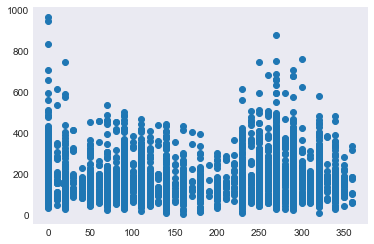

In [26]:
import matplotlib.pyplot as plt
x=weather_aqi_data[' _wdird']
y=weather_aqi_data['AQI']
plt.scatter(x,y)
plt.show()

In [27]:
weather_aqi_data.shape

(8629, 23)

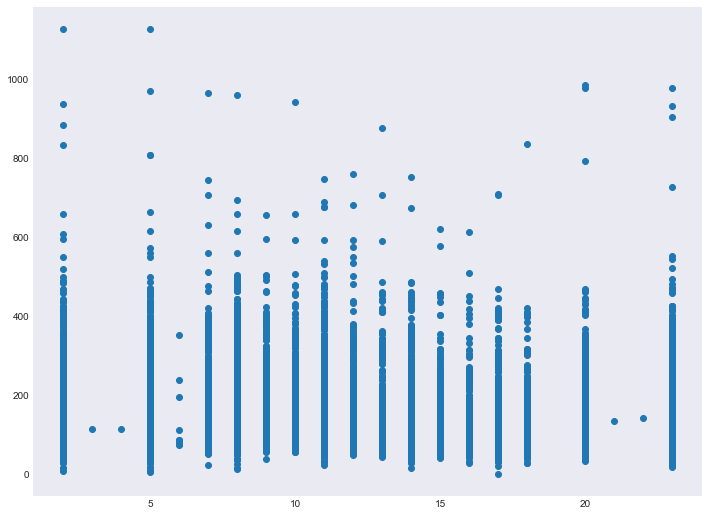

In [28]:
x=weather_aqi_data['Hour']
y=weather_aqi_data['AQI']
plt.scatter(x,y)
plt.show()

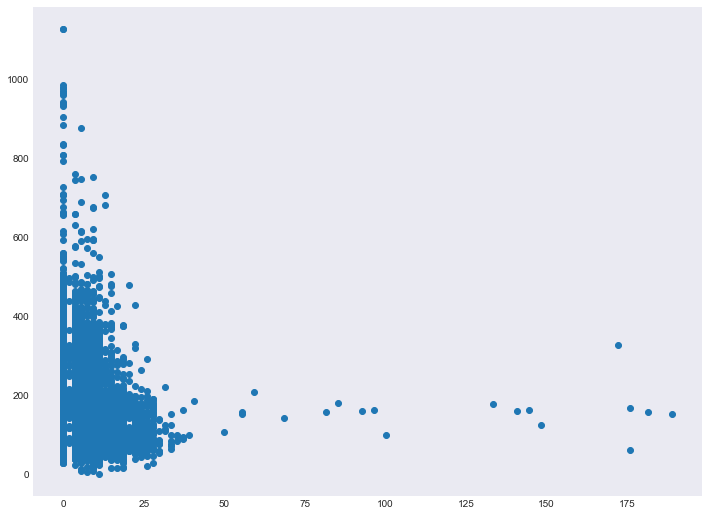

In [29]:
x=weather_aqi_data[' _wspdm']
y=weather_aqi_data['AQI']
plt.scatter(x,y)
plt.show()

In [30]:
weather_aqi_data=weather_aqi_data.rename(columns={"Date_time":"Date"})

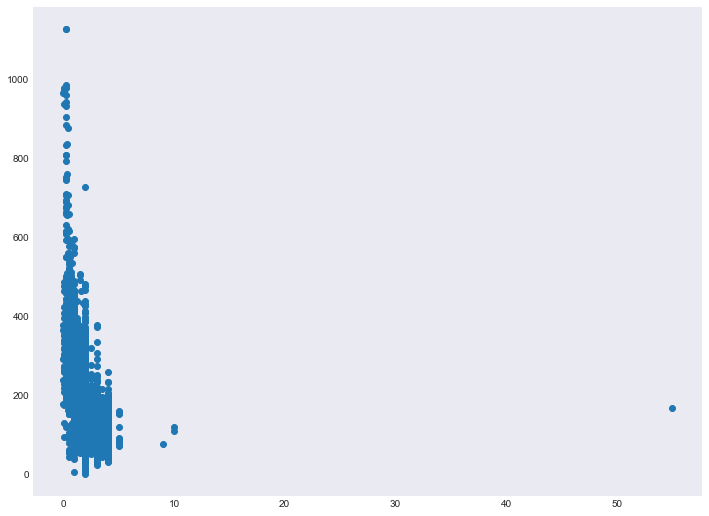

In [31]:
x=weather_aqi_data[' _vism']
y=weather_aqi_data['AQI']
plt.scatter(x,y)
plt.show()

C:\Users\Alinahuda\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


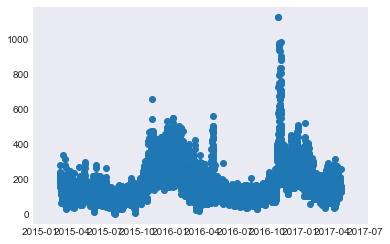

In [32]:
x=weather_aqi_data['Date']
y=weather_aqi_data['AQI']
plt.scatter(x,y)
plt.show()


In [1]:
#weather_aqi_data[['Date', 'AQI']][(weather_aqi_data['Date'] >= '2016-11-05 01') & (weather_aqi_data['Date'] <= '2016-11-06 04')]

In [33]:
weather_aqi_data.isnull().values.any()

True

In [34]:
weather_aqi_data[weather_aqi_data[' _vism'].isnull()].shape

(38, 23)

In [35]:
df=pd.DataFrame(weather_aqi_data[' _wspdm'])

In [36]:
df1=pd.DataFrame(weather_aqi_data[' _wdird'])

# Data Cleaning 

In [37]:
df.fillna(method='ffill')

,_wspdm
432,0.0
433,9.3
434,11.1
435,5.6
436,5.6
...,...
9347,11.1
9348,22.2
9349,18.5
9350,3.7


In [38]:
df1.fillna(method="ffill")

,_wdird
432,NaN
433,90.0
434,110.0
435,110.0
436,140.0
...,...
9347,320.0
9348,320.0
9349,270.0
9350,320.0


In [39]:
weather_aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8629 entries, 432 to 9351
Data columns (total 23 columns):
Date             8629 non-null datetime64[ns]
 _conds          8612 non-null object
 _dewptm         8615 non-null float64
 _fog            8629 non-null int64
 _hail           8629 non-null int64
 _hum            8598 non-null float64
 _pressurem      8594 non-null float64
 _rain           8629 non-null int64
 _snow           8629 non-null int64
 _tempm          8604 non-null float64
 _thunder        8629 non-null int64
 _tornado        8629 non-null int64
 _vism           8591 non-null float64
 _wdird          6371 non-null float64
 _wspdm          8600 non-null float64
Year             8629 non-null int64
Month            8629 non-null int64
Day              8629 non-null int64
Hour             8629 non-null int64
NowCast Conc.    8629 non-null float64
AQI              8629 non-null int64
AQI Category     8629 non-null object
Raw Conc.        8629 non-null float64
dtypes: dat

In [40]:
data=weather_aqi_data.drop([' _fog',' _hail',' _rain',' _snow',' _thunder',' _tornado','AQI Category',' _pressurem',' _vism'],axis=1)

In [41]:
data=data.dropna(axis=0,subset=[' _conds',' _wdird',' _wspdm'])
data.shape

(6327, 14)

In [42]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data[' _conds'] = LE.fit_transform(data[' _conds'])


In [43]:
data.head()

,Date,_conds,_dewptm,_hum,_tempm,_wdird,_wspdm,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
433,2015-02-24 11:00:00,26,18.0,54.0,26.0,90.0,9.3,2015,2,24,11,235.0,285,204.0
434,2015-02-24 14:00:00,26,20.0,50.0,28.0,110.0,11.1,2015,2,24,14,156.7,207,134.0
435,2015-02-24 17:00:00,26,20.0,50.0,29.0,110.0,5.6,2015,2,24,17,138.0,194,145.0
436,2015-02-24 20:00:00,16,20.0,73.0,23.0,140.0,5.6,2015,2,24,20,147.2,198,151.0
437,2015-02-24 23:00:00,16,19.0,81.0,22.0,90.0,7.4,2015,2,24,23,177.9,228,194.0


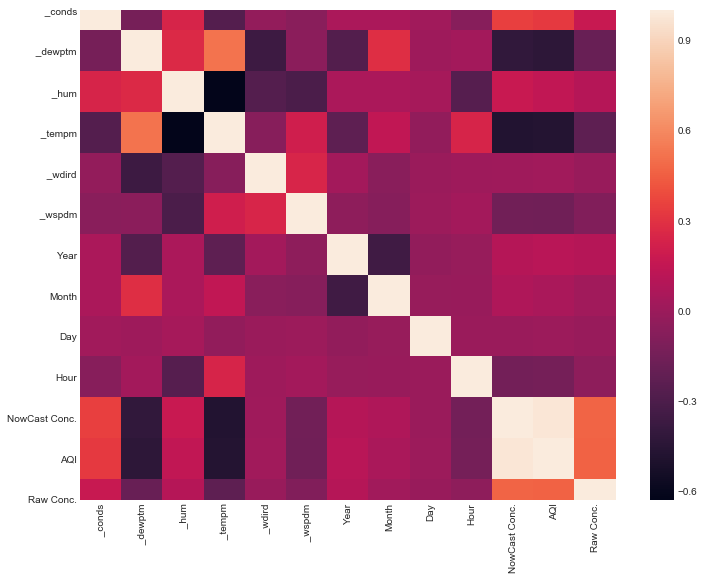

In [44]:
import seaborn as sns
# correlation matrix
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [45]:
# Show rows where any cell has a NaN
data[data.isnull().any(axis=1)].shape

(24, 14)

In [46]:
data=data.dropna(axis=0)

In [47]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303 entries, 433 to 9351
Data columns (total 14 columns):
Date             6303 non-null datetime64[ns]
 _conds          6303 non-null int32
 _dewptm         6303 non-null float64
 _hum            6303 non-null float64
 _tempm          6303 non-null float64
 _wdird          6303 non-null float64
 _wspdm          6303 non-null float64
Year             6303 non-null int64
Month            6303 non-null int64
Day              6303 non-null int64
Hour             6303 non-null int64
NowCast Conc.    6303 non-null float64
AQI              6303 non-null int64
Raw Conc.        6303 non-null float64
dtypes: datetime64[ns](1), float64(7), int32(1), int64(5)
memory usage: 714.0 KB


# Feature Engineering

In [49]:

#Convert Cycluc features
import numpy as np
data['hr_sin'] = np.sin(data.Hour*(2.*np.pi/24))
data['hr_cos'] = np.cos(data.Hour*(2.*np.pi/24))
data['mnth_sin'] = np.sin((data.Month-1)*(2.*np.pi/12))
data['mnth_cos'] = np.cos((data.Month-1)*(2.*np.pi/12))


In [48]:
data.drop(['Hour','Month'],axis=1)

,Date,_conds,_dewptm,_hum,_tempm,_wdird,_wspdm,Year,Day,NowCast Conc.,AQI,Raw Conc.
433,2015-02-24 11:00:00,26,18.0,54.0,26.0,90.0,9.3,2015,24,235.0,285,204.0
434,2015-02-24 14:00:00,26,20.0,50.0,28.0,110.0,11.1,2015,24,156.7,207,134.0
435,2015-02-24 17:00:00,26,20.0,50.0,29.0,110.0,5.6,2015,24,138.0,194,145.0
436,2015-02-24 20:00:00,16,20.0,73.0,23.0,140.0,5.6,2015,24,147.2,198,151.0
437,2015-02-24 23:00:00,16,19.0,81.0,22.0,90.0,7.4,2015,24,177.9,228,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9347,2017-04-24 11:00:00,4,17.0,25.0,34.0,320.0,11.1,2017,24,207.6,258,1985.0
9348,2017-04-24 14:00:00,4,14.0,16.0,38.0,320.0,22.2,2017,24,60.8,154,51.0
9349,2017-04-24 17:00:00,4,12.0,14.0,36.0,270.0,18.5,2017,24,49.0,134,46.0
9350,2017-04-24 20:00:00,4,15.0,27.0,32.0,320.0,3.7,2017,24,46.4,128,48.0


In [50]:
import datetime as dt

data['day_week'] = data['Date'].dt.weekday_name

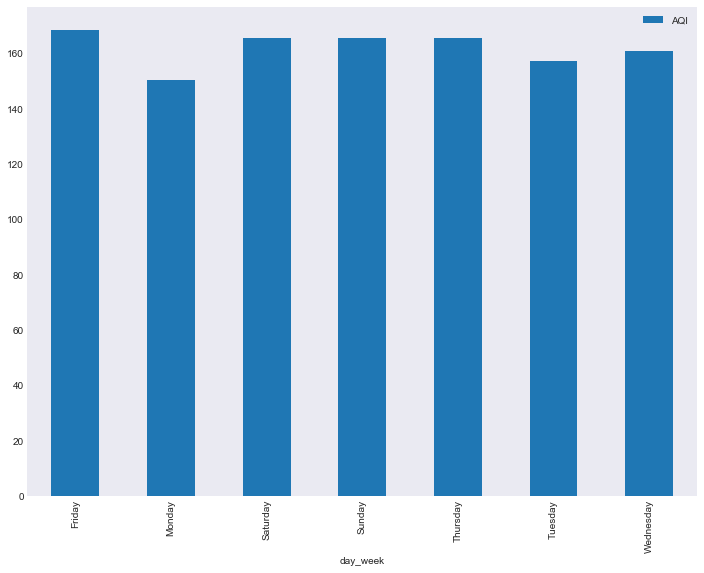

In [51]:
data['day_week_cat'] = data.day_week.astype("category").cat.codes
load = data[['AQI', 'day_week']].groupby(['day_week']).mean()
load.plot(kind='bar')

In [52]:

data = data.drop(['day_week','Date'], axis=1)

In [53]:
#spltting into train and split data
data.head()

,_conds,_dewptm,_hum,_tempm,_wdird,_wspdm,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.,day_week_cat
433,26,18.0,54.0,26.0,90.0,9.3,2015,2,24,11,235.0,285,204.0,5
434,26,20.0,50.0,28.0,110.0,11.1,2015,2,24,14,156.7,207,134.0,5
435,26,20.0,50.0,29.0,110.0,5.6,2015,2,24,17,138.0,194,145.0,5
436,16,20.0,73.0,23.0,140.0,5.6,2015,2,24,20,147.2,198,151.0,5
437,16,19.0,81.0,22.0,90.0,7.4,2015,2,24,23,177.9,228,194.0,5


In [54]:
X=data.drop(["AQI"],axis=1)
Y=data["AQI"].to_numpy()



In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)


In [56]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((4412, 13), (4412,), (1891, 13), (1891,))

In [143]:
y_test

array([133, 153, 137, ..., 179, 110, 152], dtype=int64)

# Feature Scaling


In [57]:
from sklearn.preprocessing import StandardScaler
scaling_features = StandardScaler()
X_train = scaling_features.fit_transform(X_train)
X_test = scaling_features.transform(X_test)

# Linear Regression

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Create linear regression object

regr = LinearRegression()
scores=cross_val_score(regr,X_train,y_train,cv=5,scoring="neg_mean_squared_error")

root_mean_score = np.sqrt(-scores)
print("Root mean squre error on train data",root_mean_score.mean())





Root mean squre error on train data 16.801622593598676


In [60]:
regr.fit(X_train, y_train)
test_pred = regr.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print("  Root mean square error on test set is  ", test_rmse)
linear_regression_score = regr.score(X_test, y_test)
print("Linear Regression score on test data",linear_regression_score)



  Root mean square error on test set is   17.340048384693837
Linear Regression score on test data 0.9628553029739156


In [155]:

test_pred

array([122.89844581, 131.53637838, 119.4869873 , ..., 178.61984193,
       111.73788091, 130.8750033 ])

In [68]:
pred_df = pd.Series(y_test.reshape(1891,))
test_df = pd.Series(test_pred.reshape(1891,))
final_df=pd.concat([pred_df,test_df],axis=1)
#final_df.columns['Actaul AQI', 'PRedicted AQI']
final_df

,0,1
0,133,121.828144
1,153,134.114482
2,137,121.264484
3,178,169.395585
4,154,134.875044
...,...,...
1886,156,130.280496
1887,175,162.150135
1888,179,180.067236
1889,110,109.965648


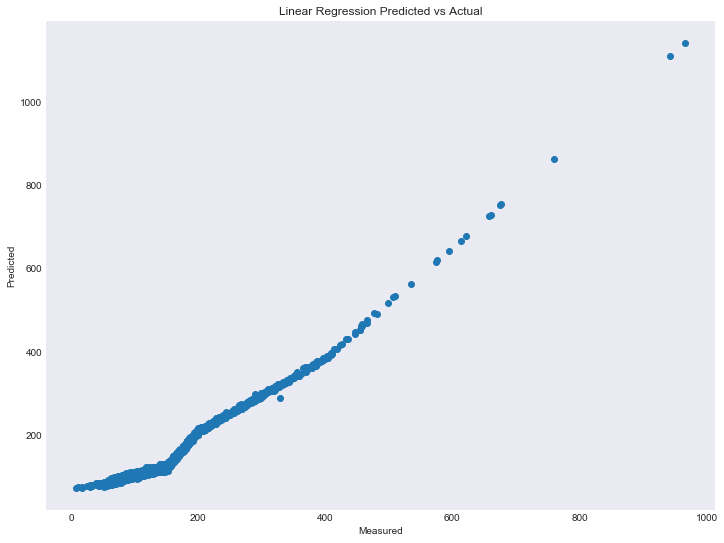

In [69]:
plt.scatter(y_test, test_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

# Random Forest


In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
regr_rf = RandomForestRegressor()
param_grid = [
    {'n_estimators': [1, 2, 4, 8, 16, 32, 64], 'max_depth': [5, 8, 15, 25] ,'bootstrap': [False]},
    
]
grid_search = GridSearchCV(regr_rf, param_grid, cv=10, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
grid_results = grid_search.cv_results_


for mean_score, params in zip(grid_results["mean_test_score"], grid_results["params"]):
    print(np.sqrt(-mean_score), params)
   
   

5.173606601081483 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 1}
5.027514047763981 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 2}
5.045579881103154 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 4}
5.020388346423415 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 8}
5.012376349337402 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 16}
4.999519939661505 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 32}
5.019142744269582 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 64}
2.317386437010962 {'bootstrap': False, 'max_depth': 8, 'n_estimators': 1}
3.3595685772938273 {'bootstrap': False, 'max_depth': 8, 'n_estimators': 2}
2.2881663835717405 {'bootstrap': False, 'max_depth': 8, 'n_estimators': 4}
2.3320826034256026 {'bootstrap': False, 'max_depth': 8, 'n_estimators': 8}
2.2757527529441277 {'bootstrap': False, 'max_depth': 8, 'n_estimators': 16}
2.4621480527511075 {'bootstrap': False, 'max_depth': 8, 'n_estimators': 32}
2.5165744635035825 {'bootstr

In [117]:
print(" Best combination of Parameter ", grid_search.best_params_)
final_model_random = grid_search.best_estimator_

 Best combination of Parameter  {'bootstrap': False, 'max_depth': 25, 'n_estimators': 8}


In [ ]:
# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# train_results = []
# test_results = []
# rf = RandomForestRegressor()
# for estimator in n_estimators:
#    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#    rf.fit(x_train, y_train)
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(n_estimators, train_results, ‘b’, label=”Train AUC”)
# line2, = plt.plot(n_estimators, test_results, ‘r’, label=”Test AUC”)
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel(‘AUC score’)
# plt.xlabel(‘n_estimators’)
# plt.show()

In [162]:
final_model_random.fit(X_train,y_train)

test_pred_random = final_model_random.predict(X_test)
test_mse_random = mean_squared_error(y_test, test_pred_random)
test_rmse_random = np.sqrt(test_mse_random)
print("  Root mean square error on test set for Random forest  ", test_rmse_random)
# decision_regression_score = regr.score(X_test, y_test)
# print("Decision tree Regression score on test data",decision_regression_score)
test_pred_random[78]


  Root mean square error on test set for Random forest   4.931193006083514


292.0

In [142]:
pred_df_random = pd.Series(y_test.reshape(1891,))
test_df_random = pd.Series(test_pred_random.reshape(1891,))
final_df_random=pd.concat([pred_df_random,test_df_random],axis=1)
#final_df.columns['Actaul AQI', 'PRedicted AQI']
final_df_random.columns=['Actual AQI','Predicted AQI']
final_df_random

,Actual AQI,Predicted AQI
0,133,133.0
1,153,153.0
2,137,137.0
3,178,178.0
4,154,154.0
...,...,...
1886,156,156.0
1887,175,175.0
1888,179,179.0
1889,110,110.0


In [ ]:
data=data.reset_index(drop=True)

In [155]:
import random
#ran_num=random.randint(1,100)
new_prediction_ran=data.drop('AQI',axis=1).iloc[5]

pred=final_model_random.predict(X_test)
y=

array([133., 153., 137., ..., 179., 110., 152.])

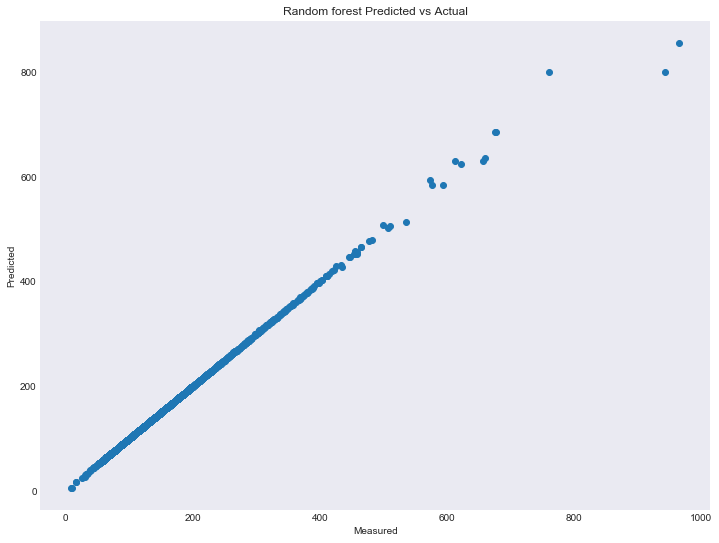

In [75]:
plt.scatter(y_test, test_pred_random)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random forest Predicted vs Actual')
plt.show()

# Decision forest Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor
regr_dt=DecisionTreeRegressor(criterion='mse',max_depth=5)  
scores=cross_val_score(regr_dt,X_train,y_train,cv=10,scoring="neg_mean_squared_error")
root_mean_score = np.sqrt(-scores)
print("Root mean squre error on train data",root_mean_score.mean())



Root mean squre error on train data 4.971600088390349


In [77]:
regr_dt.fit(X_train, y_train)
test_pred = regr_dt.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print("  Root mean square error on test set is  ", test_rmse)
decision_regression_score = regr_dt.score(X_test, y_test)
print("DEcision tree Regression score on test data",decision_regression_score)

  Root mean square error on test set is   7.641525080031486
DEcision tree Regression score on test data 0.9927863295835744


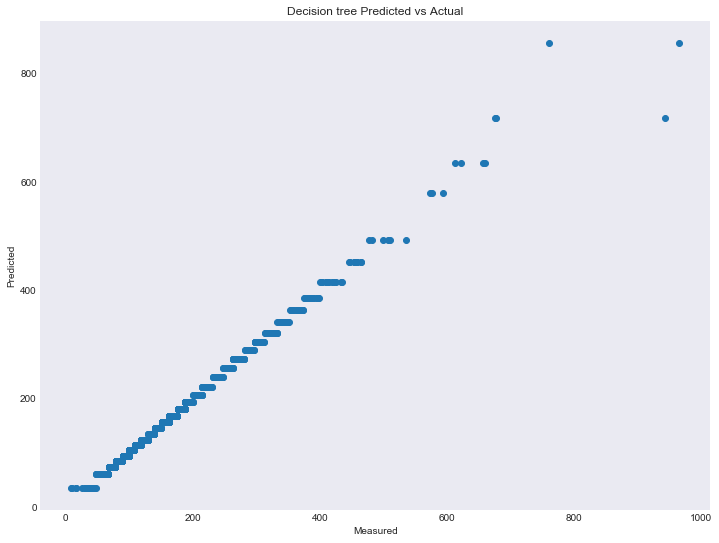

In [78]:
plt.scatter(y_test, test_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision tree Predicted vs Actual')
plt.show()

In [ ]:
#for finding optimal number of depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth,criterion="mse")
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
   
   train_mse=mean_squared_error(y_train,train_pred)
   train_rmse=np.sqrt(train_mse)
   # Add auc score to previous train results
   train_results.append(train_rmse)
   y_pred = dt.predict(X_test)
   test_mse=mean_squared_error(y_test,y_pred)
   test_rmse=np.sqrt(test_mse)
   
   # Add auc score to previous test results
   test_results.append(test_rmse)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, color="blue", label="Train RMSE")
line2, = plt.plot(max_depths, test_results, 'r--', label="Test RMSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('Tree depth')
plt.show()

# Lasso Regression

In [79]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso

lasso = Lasso()
param_grid={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2,0.2,0.1,1, 5,]}
lasso_regr=GridSearchCV(lasso,param_grid,scoring="neg_mean_squared_error",cv=10)
lasso_regr.fit(X_train, y_train)
grid_results = lasso_regr.cv_results_


for mean_score, params in zip(grid_results["mean_test_score"], grid_results["params"]):
    print(np.sqrt(-mean_score), params)



16.816937196063773 {'alpha': 1e-15}
16.8169371960623 {'alpha': 1e-10}
16.816937195914353 {'alpha': 1e-08}
16.81693573385558 {'alpha': 0.0001}
16.816923068917593 {'alpha': 0.001}
16.816858827753535 {'alpha': 0.01}
16.83253265556943 {'alpha': 0.2}
16.822790671285166 {'alpha': 0.1}
17.01603104781121 {'alpha': 1}
17.948055659575857 {'alpha': 5}


In [80]:

lasso_regr.best_params_

{'alpha': 0.01}

In [81]:
final_model=lasso_regr.best_estimator_

In [82]:
final_model.fit(X_train,y_train)

test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print("  Root mean square error on test set for Lasso regression model  ", test_rmse)

  Root mean square error on test set for Lasso regression model   17.339645665668375


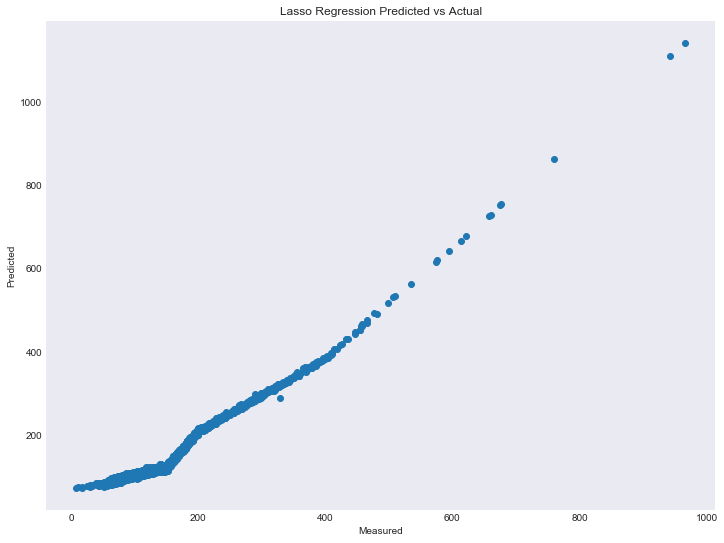

In [83]:
plt.scatter(y_test, test_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')
plt.show()

# Ridge Regression

In [84]:
from sklearn.linear_model import Ridge
ridge=Ridge()

param_grid={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2,0.2,0.1,1, 5]}
ridge_regr=GridSearchCV(ridge,param_grid,scoring="neg_mean_squared_error",cv=10)
ridge_regr.fit(X_train, y_train)
grid_results = ridge_regr.cv_results_


for mean_score, params in zip(grid_results["mean_test_score"], grid_results["params"]):
    print(np.sqrt(-mean_score), params)


16.81693719606377 {'alpha': 1e-15}
16.816937196063744 {'alpha': 1e-10}
16.81693719606159 {'alpha': 1e-08}
16.81693717427627 {'alpha': 0.0001}
16.81693697821325 {'alpha': 0.001}
16.816935020005857 {'alpha': 0.01}
16.81689470789903 {'alpha': 0.2}
16.816915680175274 {'alpha': 0.1}
16.816746472355725 {'alpha': 1}
16.816522884675127 {'alpha': 5}


In [86]:
ridge_regr.best_params_
final_model=ridge_regr.best_estimator_

In [87]:
final_model.fit(X_train,y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [88]:
test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print("  Root mean square error on test set for Ridge regression model  ", test_rmse)

  Root mean square error on test set for Ridge regression model   17.322855012177182


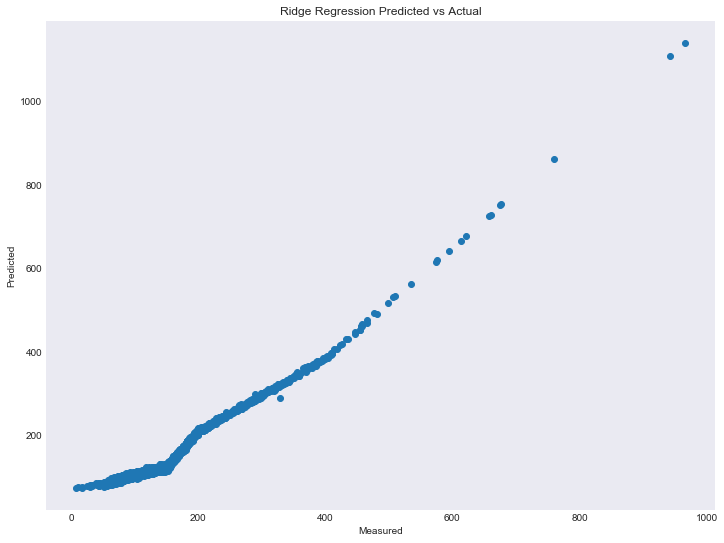

In [89]:
plt.scatter(y_test, test_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')
plt.show()

# Elastic Net

In [90]:

from sklearn.linear_model import ElasticNet
param_grid = {
                      "alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2,0.2,0.1,1, 5,],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, param_grid, scoring='neg_mean_squared_error', cv=10)

grid.fit(X_train, y_train)
grid_results = grid.cv_results_


for mean_score, params in zip(grid_results["mean_test_score"], grid_results["params"]):
    print(np.sqrt(-mean_score), params)
    

16.81693719606377 {'alpha': 1e-15, 'l1_ratio': 0.0}
16.816937196063773 {'alpha': 1e-15, 'l1_ratio': 0.1}
16.81693719606377 {'alpha': 1e-15, 'l1_ratio': 0.2}
16.81693719606377 {'alpha': 1e-15, 'l1_ratio': 0.30000000000000004}
16.816937196063773 {'alpha': 1e-15, 'l1_ratio': 0.4}
16.81693719606377 {'alpha': 1e-15, 'l1_ratio': 0.5}
16.816937196063773 {'alpha': 1e-15, 'l1_ratio': 0.6000000000000001}
16.81693719606377 {'alpha': 1e-15, 'l1_ratio': 0.7000000000000001}
16.81693719606377 {'alpha': 1e-15, 'l1_ratio': 0.8}
16.81693719606377 {'alpha': 1e-15, 'l1_ratio': 0.9}
16.816937195977356 {'alpha': 1e-10, 'l1_ratio': 0.0}
16.81693719598585 {'alpha': 1e-10, 'l1_ratio': 0.1}
16.816937195994342 {'alpha': 1e-10, 'l1_ratio': 0.2}
16.816937196002836 {'alpha': 1e-10, 'l1_ratio': 0.30000000000000004}
16.81693719601134 {'alpha': 1e-10, 'l1_ratio': 0.4}
16.816937196019833 {'alpha': 1e-10, 'l1_ratio': 0.5}
16.81693719602832 {'alpha': 1e-10, 'l1_ratio': 0.6000000000000001}
16.816937196036815 {'alpha': 1e-

In [91]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9}

In [92]:
test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print("  Root mean square error on test set for Elastic net regression model  ", test_rmse)

  Root mean square error on test set for Elastic net regression model   17.322855012177182


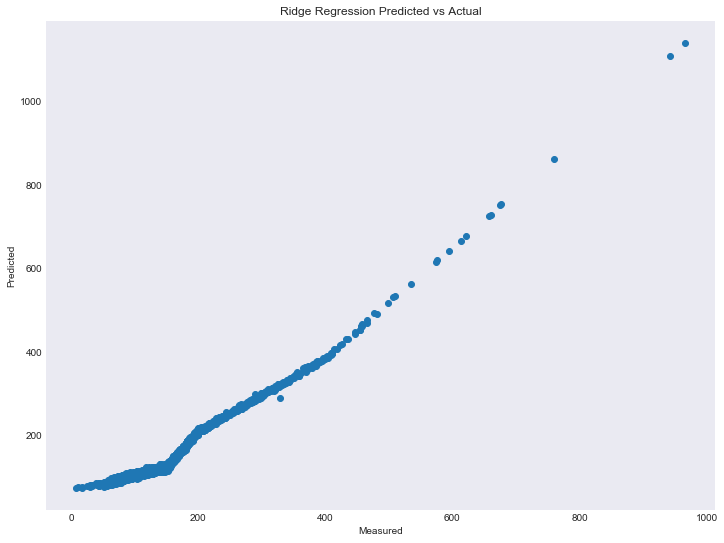

In [93]:
final_model=grid.best_estimator_
plt.scatter(y_test, test_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')
plt.show()

